In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import sklearn as sk
import seaborn as sns

In [23]:
df = pd.read_csv("data/bs.csv")
#df = df[~df.category.isin(["'es_transportation'", "'es_food'", "'es_contents'"])]
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [36]:
sns.set(rc = {'figure.figsize':(15,8)})

<AxesSubplot:xlabel='amount', ylabel='Count'>

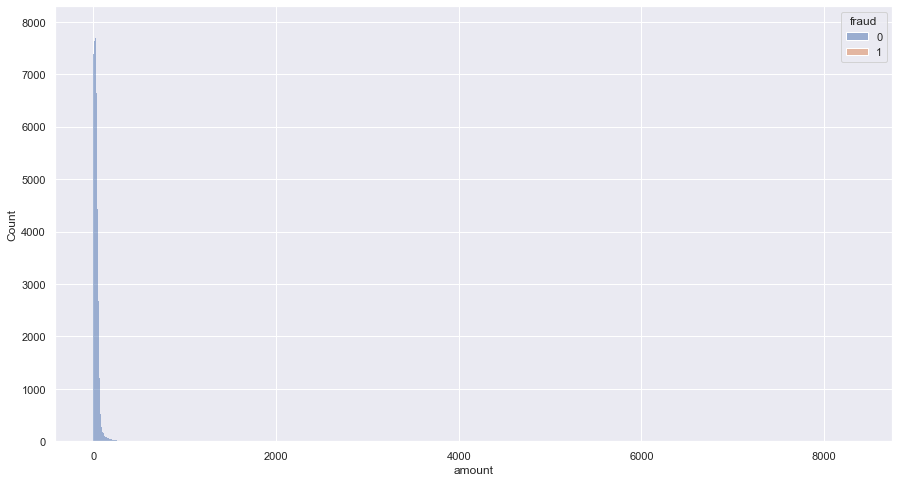

In [38]:
sns.histplot(data=df, x="amount", hue="fraud")

<AxesSubplot:xlabel='gender', ylabel='Count'>

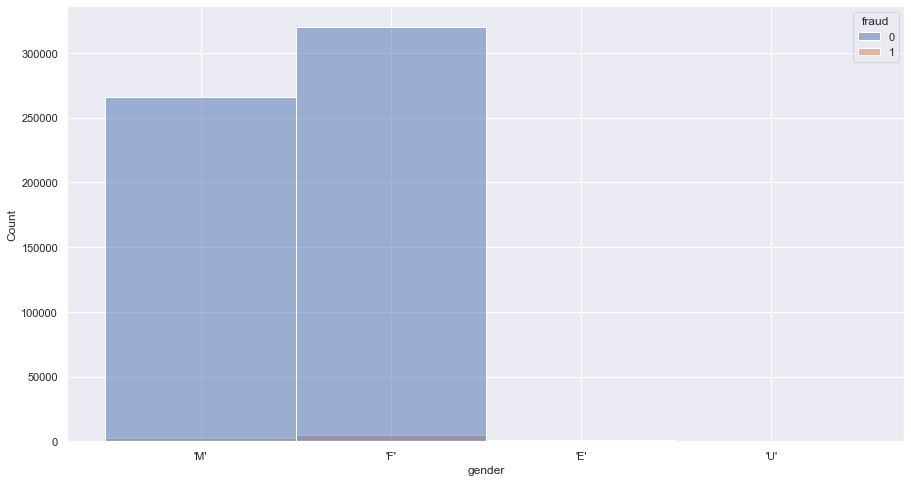

In [39]:
sns.histplot(data=df, x="gender", hue="fraud")

<AxesSubplot:xlabel='age', ylabel='Count'>

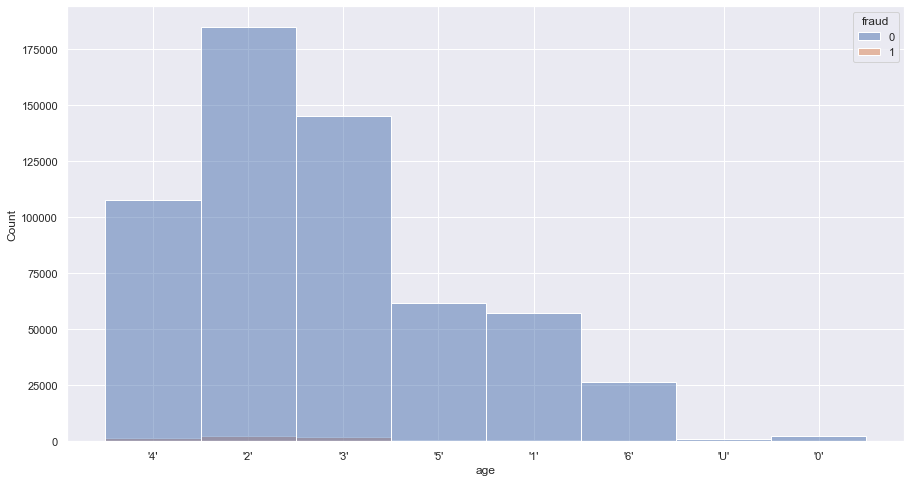

In [40]:
sns.histplot(data=df, x="age", hue="fraud")

<AxesSubplot:xlabel='category', ylabel='Count'>

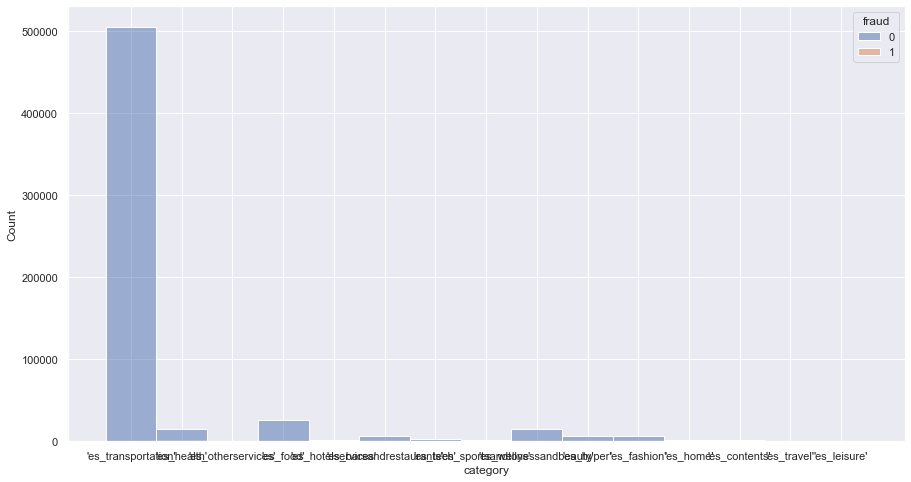

In [41]:
sns.histplot(data=df, x="category", hue="fraud")

<AxesSubplot:xlabel='step', ylabel='Count'>

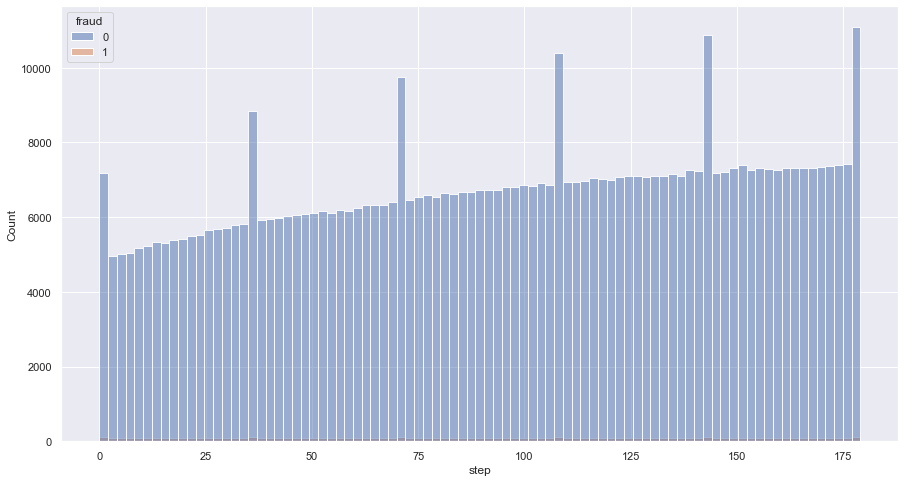

In [42]:
sns.histplot(data=df, x="step", hue="fraud")

In [ ]:
# sk.preprocessing.OneHotEncoder(categories='auto')
# categorical = ['age', 'gender', 'category']
# for cat in categorical:

In [43]:
customer = {}
merchant = {}

for index, row in df.iterrows():
    #populating customer table
    if row.customer not in customer:
        customer[row.customer] = {}
        customer[row.customer]["purchases"] = []
        customer[row.customer]["stolen"] = []
        if row.fraud == 0:
            customer[row.customer]["transactions"] = 1
            customer[row.customer]["purchases"].append(row.amount)
        elif row.fraud == 1:
            customer[row.customer]["frauds"] = 1
            customer[row.customer]["stolen"].append(row.amount)   
    else:
        if row.fraud == 0:
            customer[row.customer]["transactions"] += 1
            customer[row.customer]["purchases"].append(row.amount)
        elif row.fraud == 1:
            customer[row.customer]["frauds"] += 1
            customer[row.customer]["stolen"].append(row.amount)
        
    #populating the merchant table    
    if row.merchant not in merchant:
        merchant[row.merchant] = {}
        merchant[row.merchant]["sales"] = []
        merchant[row.merchant]["stolen"] = []
        if row.fraud == 0:
            merchant[row.merchant]["transactions"] = 1
            merchant[row.merchant]["sales"].append(row.amount)
        elif row.fraud == 1:
            merchant[row.merchant]["frauds"] = 1
            merchant[row.merchant]["stolen"].append(row.amount)
    else:
        if row.fraud == 0:
            merchant[row.merchant]["transactions"] += 1
            merchant[row.merchant]["sales"].append(row.amount)
        elif row.fraud == 1:
            merchant[row.merchant]["frauds"] += 1
            merchant[row.merchant]["stolen"].append(row.amount)
        

KeyError: 'transactions'

In [11]:
customer

{"'C1093826151'": 167,
 'purchases': [31.11,
  171.07,
  135.88,
  26.11,
  32.05,
  88.6,
  44.97,
  17.52,
  28.83,
  6.24,
  20.84,
  5.32,
  15.97,
  40.53,
  49.04,
  17.22,
  30.34,
  29.52,
  11.92,
  23.93,
  8.02,
  64.57,
  13.86,
  54.35,
  16.59,
  44.41,
  53.24,
  47.61,
  4.61,
  30.73,
  67.97,
  37.36,
  37.52,
  17.37,
  39.13,
  79.2,
  77.44,
  19.08,
  38.95,
  20.04,
  17.98,
  261.91,
  22.56,
  23.88,
  23.81,
  16.95,
  3.9,
  43.17,
  15.37,
  4.6,
  46.79,
  42.08,
  14.5,
  50.45,
  38.84,
  45.55,
  97.73,
  7.85,
  6.52,
  30.72,
  51.08,
  37.81,
  3.92,
  19.19,
  7.94,
  52.89,
  1.62,
  29.6,
  40.96,
  11.16,
  6.76,
  13.66,
  44.98,
  42.18,
  11.93,
  6.25,
  10.48,
  33.14,
  9.36,
  37.97,
  8.88,
  10.12,
  25.94,
  39.23,
  30.17,
  42.49,
  49.27,
  63.31,
  50.64,
  21.18,
  48.5,
  13.09,
  36.24,
  15.45,
  2.35,
  4.98,
  32.15,
  41.28,
  5.02,
  24.85,
  25.54,
  63.4,
  35.9,
  6.17,
  31.07,
  30.62,
  52.84,
  39.16,
  41.06,
  25.7,
